<a href="https://colab.research.google.com/github/sumanthpalla/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [46]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i (2).csv


In [47]:
df=pd.read_csv(io.BytesIO(uploaded['train_u6lujuX_CVtuZ9i.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


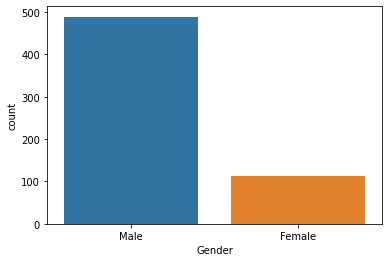

In [50]:
sns.countplot(data=df,x='Gender')

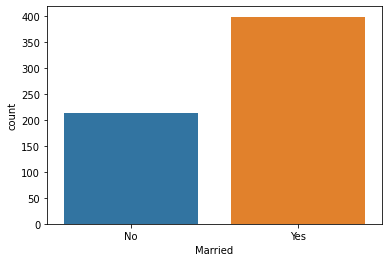

In [51]:
sns.countplot(data=df,x='Married')

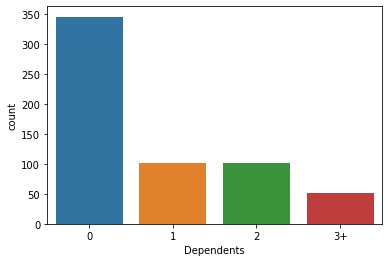

In [52]:
sns.countplot(data=df, x='Dependents')

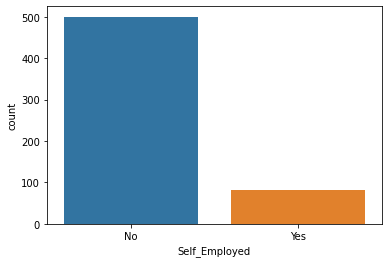

In [53]:
sns.countplot(data=df,x='Self_Employed')

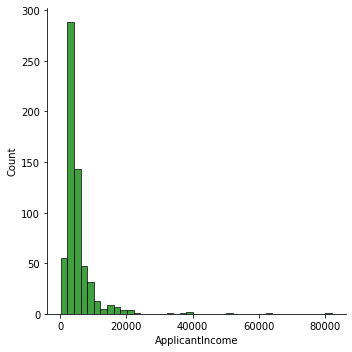

In [54]:

sns.displot(data=df,x='ApplicantIncome',binwidth=2000,color='g')

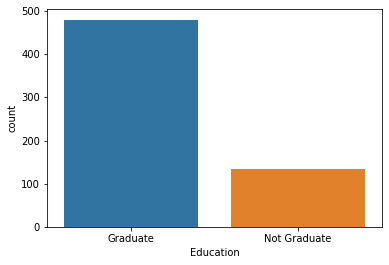

In [55]:
sns.countplot(data=df,x='Education')

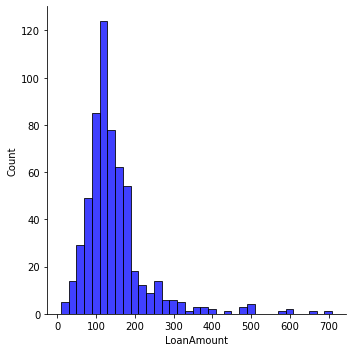

In [56]:
sns.displot(data=df,x='LoanAmount',color='b',binwidth=20)

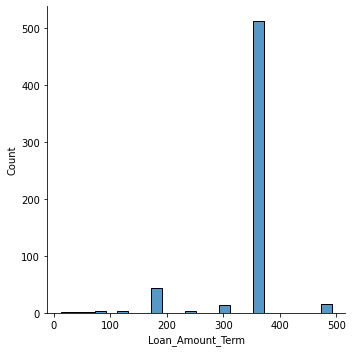

In [57]:
sns.displot(data=df,x='Loan_Amount_Term',binwidth=20)

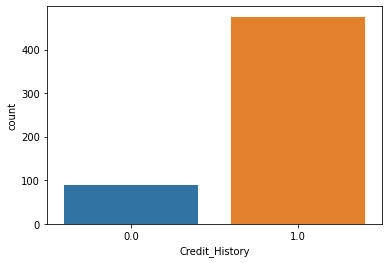

In [58]:
sns.countplot(data=df, x='Credit_History')

**Data Preprocessing**
1. Cleaning of Data

In [59]:
df.drop('Loan_ID', axis=1, inplace=True)

2. Handling Missing Values

In [60]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [61]:
df.fillna({
    'Credit_History': df.Credit_History.mode()[0],
    'Self_Employed': df.Dependents.mode()[0],
    'LoanAmount':df.LoanAmount.median(),
    'Dependents':df.Dependents.mode()[0],
    'Loan_Amount_Term': df.Loan_Amount_Term.mode()[0],
    'Gender': df.Gender.mode()[0],
    'Married': df.Married.mode()[0]
}, inplace=True)

# Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

gender_le = LabelEncoder()
df.Gender = gender_le.fit_transform(df.Gender)
married_le = LabelEncoder()
df.Married = married_le.fit_transform(df.Married)
dependents_le = LabelEncoder()
df.Dependents = dependents_le.fit_transform(df.Dependents)
education_le = LabelEncoder()
df.Education = education_le.fit_transform(df.Education)
self_employed_le = LabelEncoder()
df.Self_Employed = self_employed_le.fit_transform(df.Self_Employed)
property_area_le = LabelEncoder()
df.Property_Area = property_area_le.fit_transform(df.Property_Area)
loan_status_le = LabelEncoder()
df.Loan_Status = loan_status_le.fit_transform(df.Loan_Status)


# Machine Learning Models

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_cls.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [67]:
print("Decision tree depth :", dt_cls.get_depth())
print("Decision tree number of leaves :", dt_cls.get_n_leaves())

Decision tree depth : 18
Decision tree number of leaves : 95


In [68]:
from sklearn.metrics import accuracy_score, f1_score

y_train_pred = dt_cls.predict(X_train)
y_test_pred = dt_cls.predict(X_test)

dt_acc = accuracy_score(y_test, y_test_pred)
dt_f1 = f1_score(y_test, y_test_pred)
print("Decision tree cls accuracy on test set : {} (on train set : {})".format(dt_acc, accuracy_score(y_train, y_train_pred)))
print("Decision tree cls F1 score on test set : {} (on train set : {})".format(dt_f1, f1_score(y_train, y_train_pred)))

Decision tree cls accuracy on test set : 0.6829268292682927 (on train set : 1.0)
Decision tree cls F1 score on test set : 0.7577639751552795 (on train set : 1.0)


Results

We notice a perfect fit on the training set with a pretty big drop in performance on the test set indicating we are probably overfitting the training set.
That is a common issue with decision trees mainly solved by fine-tuning the hyperparameters of our decision tree or switching to random forest.



**Decision tree : hyperparameters tuning with CV**

In [70]:
from sklearn.model_selection import GridSearchCV

dt_estimator = DecisionTreeClassifier(random_state=42)
grid_search_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10)
}
cv_dt_model = GridSearchCV(estimator=dt_estimator, param_grid=grid_search_params)
cv_dt_model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [71]:
print("Best depth :", cv_dt_model.best_estimator_.get_depth())
print("Best number of leaves :", cv_dt_model.best_estimator_.get_n_leaves())
print("Best params :", cv_dt_model.best_estimator_.get_params())


Best depth : 1
Best number of leaves : 2
Best params : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [72]:
y_train_pred = cv_dt_model.predict(X_train)
y_test_pred = cv_dt_model.predict(X_test)

cv_dt_acc = accuracy_score(y_test, y_test_pred)
cv_dt_f1 = f1_score(y_test, y_test_pred)
print("Optimized decision tree cls accuracy on test set : {} (on train set : {})".format(cv_dt_acc, accuracy_score(y_train, y_train_pred)))
print("Optimized decision tree cls F1 score on test set : {} (on train set : {})".format(cv_dt_f1, f1_score(y_train, y_train_pred)))

Optimized decision tree cls accuracy on test set : 0.7886178861788617 (on train set : 0.814663951120163)
Optimized decision tree cls F1 score on test set : 0.8586956521739131 (on train set : 0.8807339449541285)


**Results**

So our optimized decision tree does indeed perform better on the test set than our previous decision tree indicating we may have reduced overfitting.

But we notice that cross-validation led to a weird discovery : our best tree has only a depth of 1 and 2 leaves !

**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(criterion='entropy', random_state=42)
rf_cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

rf_acc = accuracy_score(y_test, y_test_pred)
rf_f1 = f1_score(y_test, y_test_pred)
print("Random Forest cls accuracy on test set : {} (on train set : {})".format(rf_acc, accuracy_score(y_train, y_train_pred)))
print("Random Forest cls F1 score on test set : {} (on train set : {})".format(rf_f1, f1_score(y_train, y_train_pred)))

Random Forest cls accuracy on test set : 0.7723577235772358 (on train set : 1.0)
Random Forest cls F1 score on test set : 0.8461538461538461 (on train set : 1.0)


**Results**

We're once again fitting the training set perfectly but our evaluation metrics improved compared to our simple decision tree.

**Correlation Matrix**

Correlation matrices allow us to check for correlation between our features and help us foresee such outcomes.
Inspecting correlation matrices is usually part of EDA and it was my mistake not to do it in the first place.

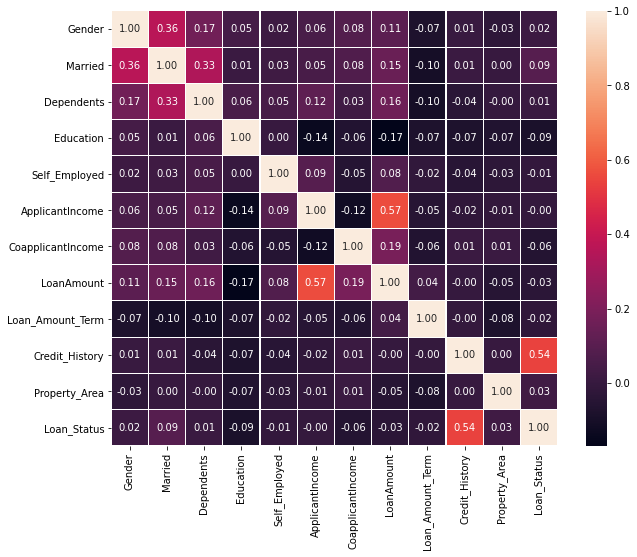

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.1, ax=ax)

We can observe that Loan Amount has a positive correlation(>0.5) with Applicant Income and Loan Status with Credit History.

Final Test Accuaracy and F1_scores of various models.

In [78]:
from tabulate import tabulate

print(tabulate([
    ['Decision tree', round(dt_acc, 2), round(dt_f1, 2)],
    ['Optimized DT', round(cv_dt_acc, 2), round(cv_dt_f1, 2)],
    ['Random forest', round(rf_acc, 2), round(rf_f1, 2)]],
    headers=['Model', 'Accuracy', 'F1 score']))


Model            Accuracy    F1 score
-------------  ----------  ----------
Decision tree        0.68        0.76
Optimized DT         0.79        0.86
Random forest        0.77        0.85
